Network Science FSS 2025

# Home Assignment 1

Submit your solution via ILIAS by **23.59 on Monday, 10th of March**.

Submit your solutions in teams of 3-4 students. Unless explicitly agreed otherwise in advance, **submissions from teams with more or less members will NOT be graded**.
Make sure that all members of your team are added to the team on ILIAS using their ILIAS account handles. As names are not unique, if the system indicates there is "no access", then the wrong person has been added. Submit one notebook per team, do not submit the dataset(s) you used. Also, do NOT compress/zip your submission!

You may use the code from the exercises and basic functionalities that are explained in official documentation of Python packages without citing, __all other sources must be cited__. In case of plagiarism (copying solutions from other teams or from the internet) ALL team members may be expelled from the course without warning.

#### General guidelines:
* Make sure that your code is executable, any task for which the code does not directly run on our machine will be graded with 0 points.
* If you use packages that are not available on the default or conda-forge channel, list them below. Also add a link to installation instructions.
* Ensure that the notebook does not rely on the current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that
    are not in scope anymore.
  * Do not rename any of the datasets you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory.
* Make sure you clean up your code before submission, e.g., properly align your code, and delete every line of code that you do not need anymore, even if you may have experimented with it. Minimize usage of global variables. Avoid reusing variable names multiple times!
* Ensure your code/notebook terminates in reasonable time.
* Feel free to use comments in the code. While we do not require them to get full marks, they may help us in case your code has minor errors.
* For questions that require a textual answer, please do not write the answer as a comment in a code cell, but in a Markdown cell below the code. Always remember to provide sufficient justification for all answers.
* You may create as many additional cells as you want, just make sure that the solutions to the individual tasks can be found near the corresponding assignment.
* If you have any general question regarding the understanding of a task, do not hesitate to post in the student forum in ILIAS, so we can clear up such questions for all students in the course.

Additional packages (if any):
 - Example: `powerlaw`, https://github.com/jeffalstott/powerlaw

### The Train Bombing Network

For most of this home assignment, you will be working on the train bombing network. This is provided in an edgelist format in the file _train.edgelist_.

This undirected network contains contacts between suspected terrorists involved in the train bombing of Madrid on the 11th of March 2004, as reconstructed from newspapers. A node represents a terrorist and an edge between two terrorists shows that there was contact between the two terrorists. The edge weights denote how 'strong' a connection was. This includes friendship and co-participation in training camps or previous attacks. In the following, we will denote this network as $G$.

<span style="color:orange">__Load edge weights, but ignore them for the calculations in Task 1 and 2__</span>

__References:__  
1) Dataset in the KONECT network repsitory: http://konect.cc/networks/moreno_train/
2) Brian Hayes. Connecting the dots. can the tools of graph theory and social-network studies unravel the next big plot? American Scientist, 94(5):400--404, 2006.

In [1]:
# imports
import networkx as nx
import numpy as np
from typing import List, Optional, Tuple, Dict

import matplotlib.pyplot as plt

In [7]:
from collections import Counter

### Task 1:  Basic Network Properties (8 pts)

__a)__ Read in the data file and store the network as variable `G`. Store the number of nodes and edges of `G` into variables `n_nodes` and `n_edges` respectively. **(2 pts)**


In [3]:
G = nx.read_edgelist("train.edgelist", data=[('weight', int)], comments="%")
n_nodes = G.number_of_nodes() # get the number of nodes
n_edges = G.number_of_edges()
print(n_nodes)
print(n_edges)

64
243


__b)__ Compute the average degree and the density of `G`. Store them as variables `avg_degree` and `density`. Is it sparse? Explain your answer! **(2 pts)**


In [ ]:
degrees = [edge for node, edge in G.degree()]
avg_degree = sum(degrees) / n_nodes # get the sum of edges of each node, and devided by the number of nodes
print(avg_degree)

density = nx.density(G)
print(density)


7.59375
0.12053571428571429


__Answer:__ it's much lower than 0.5, tends to sparse.

__c)__ Determine the network's diameter and average shortest path length. Store them as variables `diameter`and `avg_pl`. **(2 pts)**

Bonus (not required to get 100% of the points, but you can gain additional points beyond 100%): Recalculate diameter and average shortest path length taking edge weights into account and store them as variables `diameter_weighted` and `avg_pl_weighted`. **(2 pts)**

In [ ]:
nx.is_connected(G) # ensure it's connected

True

In [ ]:
diameter = nx.diameter(G) # calculate the diameter
avg_pl = nx.average_shortest_path_length(G) # calculate the average shortest path length
print(diameter)
print(avg_pl)

6
2.6909722222222223


In [ ]:
diameter_weighted = nx.diameter(G, weight = 'weight') # consider weights into account
avg_pl_weighted = nx.average_shortest_path_length(G, weight = 'weight')
print(diameter_weighted)
print(avg_pl_weighted)

6
2.7509920634920637


__d)__ Compute the average local and global clustering coefficient and store them as `avg_lcc` and `avg_gcc`. Does the network show signs of the small world effect? Explain your answer! **(4 pts)**

In [ ]:
avg_lcc = nx.average_clustering(G) # calculate average local clustering coefficient
avg_gcc = nx.transitivity(G) # calculate average global clustering coefficient
print(avg_lcc)
print(avg_gcc)

0.6223250206309917
0.5610361958836054


__Answer:__ the average local and global clustering coefficient are higher than 0.5, and the network's diameter and average shortest path length are also low, it can be a small world

### Task 2: Node Centralities (15 pts)

In this task, we consider the following four node centrality measures:

1. Degree Centrality (DC)
2. Closeness Centrality (CC)
3. Betweenness Centrality (BC)
4. Eigenvector Centrality (EC)

__a)__ For each of the four measures, compute and store the corresponding centrality values of all nodes in the network in dictionaries `DC`, `CC`, `BC` and `EC`! The keys of the dictionaries should represent the node IDs and the corresponding values should represent the centrality of that node.

Additionally, for each of the four measures store the node IDs (not the centrality values) with the 10 highest centrality values in lists `DC_top`, `CC_top`, `BC_top` and `EC_top`. They should be in descending order such that the first node in each list should have the highest centrality value and so on. **(3 pts)**

**Example:** _In the example below node 4 has a betweenness centrality of 0.01, which is the third highest value in the network of 4 nodes, as denoted by its third position in list `BC_top`:_

`BC = {'1': 0.05, '2': 0.221, '3': 0.0, '4': 0.01}`

`BC_top = ['2', '1', '4', '3']`


In [ ]:
DC = nx.degree_centrality(G) # get the Degree Centrality
CC = nx.closeness_centrality(G) # get the Closeness Centrality
BC = nx.betweenness_centrality(G) # get the Betweenness Centrality
EC = nx.eigenvector_centrality(G) # get the Eigenvector Centrality

def sort_ten(dic):
    return [node for node, value in sorted(dic.items(), key = lambda x:x[1])][:10] # get the 10 highest centrality values

DC_top = sort_ten(DC)
CC_top = sort_ten(CC)
BC_top = sort_ten(BC)
EC_top = sort_ten(EC)


print(DC_top)
print(CC_top)
print(BC_top)
print(EC_top)

['35', '38', '42', '43', '54', '60', '48', '62', '2', '32']
['48', '47', '55', '56', '57', '62', '39', '61', '63', '64']
['2', '4', '5', '9', '11', '12', '13', '27', '28', '29']
['48', '47', '62', '50', '51', '52', '53', '61', '46', '55']


__b)__ For each of the four measures, compute the average and maximum distance of the most central node to all other nodes in the network. Store the average distances as `DC_avg`, `CC_avg`, `BC_avg`, `EC_avg` and maximum distances as `DC_max`, `CC_max`, `BC_max`, `EC_max`. **(4 pts)**

In [ ]:
def distance(dic):
    central_node = sort_ten(dic)[0] # get the most central node
    dists = nx.shortest_path_length(G, source = central_node) # get the distance to other nodes
    dist_list = [dist for node, dist in dists.items() if node != central_node] # exclude to itself
    avg_dist = sum(dist_list) / len(dist_list) # get the average distance
    max_dist = max(dist_list) # get the maximum distance
    return avg_dist, max_dist

DC_avg, DC_max = distance(DC)
CC_avg, CC_max = distance(CC)
BC_avg, BC_max = distance(BC)
EC_avg, EC_max = distance(EC)


4.079365079365079
6


__c)__ For each of the four centrality measures, scale all node centralities in the graph such that their maximum is 1, i.e., divide them by the maximum value occuring in the network. Store the updated node centralities as `DC_scaled`, `CC_scaled`, `BC_scaled` and `EC_scaled`, in the same format as in 2a. For each centrality measure, plot the graph in a spring layout with node colors according to their centrality. Use the "coolwarm" colormap from matplotlib for this coloring. Make sure all networks have the same orientation! **(5 pts)**

In [ ]:
def scale(dic):
    scaled = {}
    for node, value in dic.items():
        scaled[node] = value / max(dic.values())
    return scaled
DC_scaled = scale(DC)


__d)__ After looking at these measures simultaneously, we look into how those measures differ from each other.
Use your node-wise similarities computed in a) to compute the correlation coefficient[<sup>1</sup>](#fn1) of all node-wise similarities between any two centrality measures. Store the correlation coefficients as variables `DC_CC`, `DC_BC`, `DC_EC`, `CC_BC`, `CC_EC` and `BC_EC` (e.g. store the correlation coefficient of the degree centrality (DC) and the closeness centrality (CC) in `DC_CC`).

Which pair of centrality measures is the most/least correlated, and which measure is most/least correlated with all other centrality measures (average of pairwise correlations)? Argue why that is the case! **(3 pts)**  

<span id="fn1"><sup>1</sup>[Pearson product-moment correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (available in numpy)</span>

__Answer:__ _Please provide your answer here!_

### Task 3: Weak Ties (9 pts)

Having looked at the nodes of the network, we now consider the (weighted) edges of the network.

__a)__ Take a look at the distribution of edge weights. Which edge weights are present in the network, and how often does each edge weight occur? Plot these occurences using a histogram. **(2 pts)**

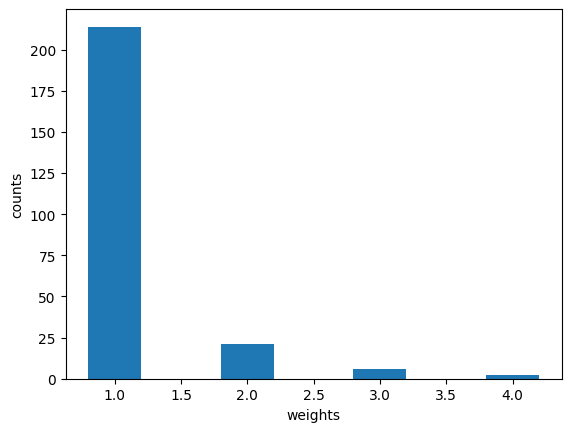

In [10]:
weights_data = [data['weight'] for n, e, data in G.edges(data = True)] # get all the weights from G
weights_counts = Counter(weights_data) # count the weights
weights = weights_counts.keys() # get the value of different weights
counts = weights_counts.values() # get the value of how many times each weight occurs
plt.bar(weights, counts, width=0.4, align='center') # prepare the histogram
plt.xlabel('weights')
plt.ylabel('counts')
plt.show()

__b)__ Write a function that computes the neighborhood overlap score of a given edge, using the function signature which is specified in the cell below. Note that we want to return -1 if the edge does not exist in the network. For an edge between nodes $u$ and $v$, we do not count $u$ and $v$ in the union of neighbors in the denominator. **(4 pts)**

**Example:** _Let `H = nx.from_numpy_array(np.array([[0,1,1,1,0],[1,0,0,1,1],[1,0,0,1,0],[1,1,1,0,0],[0,1,0,0,0]]))` be an undirected NetworkX graph. Your implementation of `neighborhood_overlap` should return the same output as in the given examples below. Please note that correct output values do not necessarily mean that you have implemented the function correctly. Ideally, you should come up with your own data to test your function._

`neighborhood_overlap((0,1), H) == 0.3333333333333333`

`neighborhood_overlap((0,2), H) == 0.5`

`neighborhood_overlap((0,3), H) == 1.0`

`neighborhood_overlap((1,4), H) == 0.0`

In [ ]:
# INPUT PARAMETERS
#
# edge: pair of node IDs that represents the edge we want to compute the node overlap on.
# G: networkx graph whose nodes we want to check. You can assume that G is undirected, but weighted.
#
# RETURN VALUE
# the node overlap of the given edge as a float

def neighborhood_overlap(edge, G):
    # your code here
    pass

__c)__ Apply your neighborhood overlap function on the network $G$, and save all edges which are local bridges as tuples into a list `lb`. The first two values of the tuple should be the nodes of an edge, while the third value should represent the weight of this edge. Save only edges that are truly local bridges, i.e., through which information from nodes other than the two adjacent nodes can flow. Again, plot the graph using a spring layout with the same orientation as in task 2, with all nodes being blue, and color all edges which are local bridges in red. **(4 pts)**

**Example:** _In the example below there are three local bridges in total. The first local bridge is an edge between the nodes 6 and 33 with an edge weight of 1:_

`lb = [('6', '33', 1.0), ('8', '39', 1.0), ('8', '48', 1.0)]`